<a href="https://colab.research.google.com/github/DattaIn/idatta.github.io/blob/master/Statistical-Data-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

The dataset chosen for this experiment is the Movies data set. This dataset contains information on 10,000 movies collected from The Movie Database (TMDb), including user evaluations and revenues.

## Information

###  Exploratory Data Analysis (EDA)

" Exploratory Data Analysis (EDA) is an attitude, a state of flexibility, a willingness to look for those things that we believe are not there, as well as those we believe to be there. -- John W. Tukey "

Exploratory Data Analysis (EDA) in Python is the first step in the data analysis process developed by “John Tukey” in the 1970s. In statistics, exploratory data analysis is an approach for analysing datasets to summarize key characteristics, often using visual methods. EDA employs a variety of techniques (mostly graphical) to:

- Maximize insight into a dataset
- Uncover underlying structure
- Extract important variables
- Detect outliers and anomalies
- Test underlying assumptions
- Develop parsimonious models, and
- Determine optimal factor settings.






Let's import all the necessary libraries to be used ahead

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Wrangling

Loading the datasets and checking for the first ten rows

In [ ]:
data = pd.read_csv("movies.csv") # Loading the data

In [ ]:
# YOUR CODE HERE for Checking for first 10 rows from the data
data.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illuminati

Checking the shape of the dataset

In [ ]:
data.shape

(10866, 21)

Checking for the datatypes of each variable in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## <font color="green">Exploratory Data Analysis</font>

### Data Cleaning

##### Checking for the duplicate values in the dataset.

- We use 'duplicated()' function in pandas that returns the duplicate row as True and other as False. For counting the duplicate elements we sum all the rows

In [ ]:
sum(data.duplicated())

1

We can see that there exists duplicates in the dataset. So, we can drop these duplicated rows using 'drop_duplicates()' function.

In [ ]:
# YOUR CODE HERE to drop duplicates from the dataset
data_without_duplicates = data.drop_duplicates()

In [ ]:
# YOUR CODE HERE for checking for the shape of the dataset after removing duplicate records from it.
data_without_duplicates.shape

(10865, 21)

##### Removing the unnecessary columns that are not needed in the analysis process.

From the dataset we can see that the columns like id, imdb_id, homepage, tagline, overview, budget_adj and revenue_adj are not needed in the analysis process as of now. So, let's drop these columns from the dataset using the `drop` function.


In [ ]:
data_without_duplicates.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)

In [ ]:
# YOUR CODE HERE for checking the shape of the dataset after removing unused columns from the dataset
data_without_duplicates.shape

(10865, 15)

##### Checking for the null values using `isna()` function.

In [ ]:
data_without_duplicates.isna()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


As the presence of null values is detected above, we need to see the null counts in each variable.

In [ ]:
data_without_duplicates.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

There are huge number of null counts in keywords followed by production_companies. So, let's drop all the rows containg null values using dropna function.

In [ ]:
data_without_duplicates.dropna(inplace=True)

In [ ]:
# YOUR CODE HERE for checking the shape of the dataset after removing rows containting null values
data_without_duplicates.shape

(8666, 15)

Changing Format Of Release Date Into Datetime Format

In [ ]:
data_without_duplicates['release_date'] = pd.to_datetime(data_without_duplicates['release_date'])
data_without_duplicates['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 8666, dtype: datetime64[ns]

### Descriptive Statistics

Now let's see the basic statistical computations on the dataset like count of data points, maximum value, minimum value, mean, standard deviation, etc using describe function

In [ ]:
data_without_duplicates.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,8666.000000,8666.000000,8.666000e+03,8.666000e+03,8666.000000,8666.000000,8666.000000,8666.000000
mean,57003.179206,0.741937,1.770937e+07,4.924863e+07,103.815140,264.204823,6.003612,2000.129818
std,86242.565745,1.087657,3.357362e+07,1.289529e+08,26.207186,635.195808,0.893539,13.221278
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,9816.750000,0.249990,0.000000e+00,0.000000e+00,91.000000,20.000000,5.500000,1993.000000
50%,16216.500000,0.449377,1.500000e+06,1.793820e+05,100.000000,54.000000,6.100000,2004.000000
75%,54003.000000,0.842984,2.100000e+07,3.890269e+07,113.000000,200.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000


Checking for the movies whose revenue or budget is zero

In [ ]:
data_without_duplicates[(data_without_duplicates['revenue'] == 0) | (data_without_duplicates['budget'] == 0)]

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,gambling|bodyguard|remake,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,new year's eve|fire|showdown|terrorist|embassy,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,desert|hunting,95,Thriller,Furthur Films,2015-04-17,81,5.5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966


Drop the rows which contain incorrect or inappropriate values.

In [ ]:
# Revenue
data_without_duplicates[data_without_duplicates['revenue'] == 0].shape

(4130, 15)

In [ ]:
# budget
data_without_duplicates[data_without_duplicates['budget'] == 0].shape

(3940, 15)

In [ ]:
# runtime
data_without_duplicates[data_without_duplicates['runtime'] == 0].shape

(7, 15)

From the above results, we can infer that there are quite many observations where budget and revenue have zero values. So, we can create a new dataframe where the rows whose budget or revenue or runtime values is 0

In [ ]:
cleaned_Data = data_without_duplicates[(data_without_duplicates['budget'] != 0) & (data_without_duplicates['revenue'] != 0) & (data_without_duplicates['runtime'] != 0) ]

In [ ]:
cleaned_Data.shape

(3677, 15)

### Understanding Relationships and New Insights Through Plots

#### 1. Does the budget amount provide a good indicator of how the movie will be voted?


- We can answer this question by finding the correlation between budget and viewer's votes(vote_average)

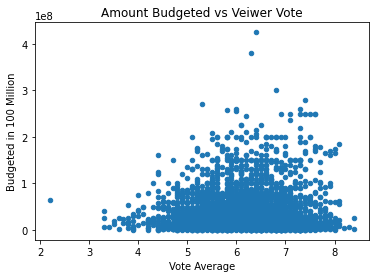

In [ ]:
# Plot to show the correlation between budget and veiwer's votes(vote_average)

cleaned_Data_bd_vote = cleaned_Data[['budget',	'vote_average']]
cleaned_Data_bd_vote.plot(x='vote_average', y='budget', kind='scatter')
plt.ylabel("Budgeted in 100 Million")
plt.xlabel("Vote Average")
plt.title("Amount Budgeted vs Veiwer Vote")
plt.show()

Looking at the above scatter plot it appears that there isn't a strong correlation between the movie's budget and what the viewers vote(vote_average). Even from the plot above we can say that spending more money will help guarantee a none low rated movie, but it does not guarantee that the money had to have been spent to make it a high rated movie. Note that the lowest budgeted movies have the highest and lowest rated movies.

In [ ]:
#calculating the correlation coefficent
cleaned_Data.budget.corr(cleaned_Data.vote_average)

0.021488408454839916

A correlation value of 1 indicates a very strong positive correlation and a correlation value of 0 indicates no correlation. The obtained correlation value 0.0214 shows that it has only a slight positive correlation. From above plot and correlation coefficent we can infer that the budget is not a good indicator of how the movie will be voted upon.

#### 2. What kinds of properties are associated with movies that have high revenues?

      - We can answer this question by finding the correlation between
          * Revenue Vs Budget
          * Revenue Vs Popularity
          * Revenue Vs Vote Average,
          * Revenue Vs Runtime

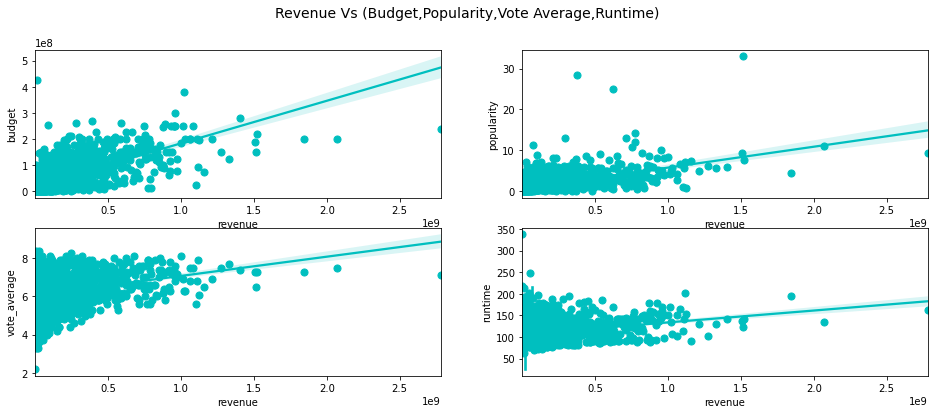

In [ ]:
cleaned_Data_high_revenue = cleaned_Data[['revenue',	'budget', 'popularity', 'vote_average', 'runtime']]

fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Revenue Vs (Budget,Popularity,Vote Average,Runtime)",fontsize=14)
sns.regplot(x=cleaned_Data_high_revenue['revenue'], y=cleaned_Data_high_revenue['budget'], color='c',ax=axes[0][0])
sns.regplot(x=cleaned_Data_high_revenue['revenue'], y=cleaned_Data_high_revenue['popularity'], color='c',ax=axes[0][1])
sns.regplot(x=cleaned_Data_high_revenue['revenue'], y=cleaned_Data_high_revenue['vote_average'], color='c',ax=axes[1][0])
sns.regplot(x=cleaned_Data_high_revenue['revenue'], y=cleaned_Data_high_revenue['runtime'], color='c',ax=axes[1][1])
sns.set_style("whitegrid")

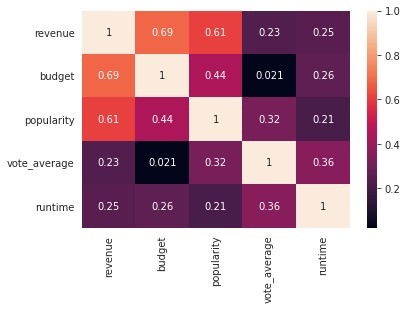

In [ ]:
# Plotting the correlation matrix

correlation_mat = cleaned_Data_high_revenue.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

From the above Plots we can infer that

* Higher revenues from higher budget movies is observed; a positively correlated relationship can be inferred from the correlation value of 0.69. It indicates that there is a good possibility that movies with higher investments result in better revenues.

* It can be seen that the revenue increases with increasing popularity. As can be expected, if the popularity of a movie is high then the revenue of the movie will also be high.

* The correlation between revenue and vote average is 0.21. So vote average is not highly related to the revenue.

* The correlation between revenue and runtime is 0.24. So runtime is not highly related to the revenue.

#### 3. Which length movies are most liked by the audiences according to their popularity?

we will use groupby function and group the data according to their runtime and plot the data using their popularity.

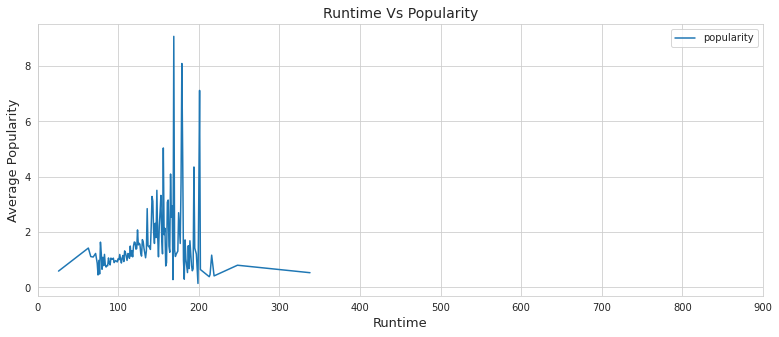

In [ ]:
cleaned_Data.groupby('runtime')['popularity'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))

# setup the title of the figure
plt.title("Runtime Vs Popularity",fontsize = 14)
# setup the x-label and y-label of the plot.
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Popularity',fontsize = 13)
plt.legend()

According to the plot we can say that movies in the range of 100-200 mins runtime are most popular. Longer movies are less popular among the audience.

#### 4. Which Month Released the Highest Number Of Movies In All Of The Years?

In [ ]:
#extract the month number from the release date.
month_release = cleaned_Data['release_date'].dt.month

In [ ]:
#count the movies in each month using value_counts().
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months

In [ ]:
#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

Text(0, 0.5, 'Number of movie releases')

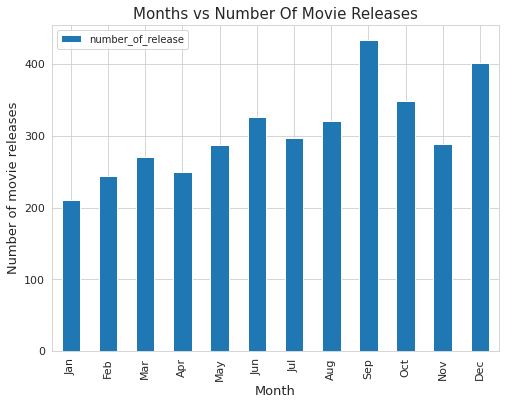

In [ ]:
#plot the bar graph using plot.

# YOUR CODE HERE
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))

#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)

According to the plot we can conclude that there are higher number of releases in the months of September and December.

#### Research Questions

* Movie with Highest And Lowest Budget?
* Which Genre Has The Highest Release Of Movies?
* Which Movie Has The Highest Or Lowest Profit? Top 10 movies which earn highest profit?

In [ ]:
print('Movie with Highest Budget')
print(cleaned_Data.loc[cleaned_Data['budget'].idxmax()]['original_title'])
print('Movie with Lowest Budget')
print(cleaned_Data.loc[cleaned_Data['budget'].idxmin()]['original_title'])

print('Genre with Highest Release')
genre_release = cleaned_Data.groupby(by=['genres'])['release_year'].count().reset_index().sort_values(by=['release_year'], ascending=False)
print(genre_release.loc[genre_release['release_year'].idxmax()]['genres'])

print('Movie with Highest Profit')
print(cleaned_Data.loc[cleaned_Data['revenue'].idxmax()]['original_title'])
print('Movie with Lowest Profit')
print(cleaned_Data.loc[cleaned_Data['revenue'].idxmin()]['original_title'])

Movie with Highest Budget
The Warrior's Way
Movie with Lowest Budget
Lost & Found
Genre with Highest Release
Drama
Movie with Highest Profit
Avatar
Movie with Lowest Profit
Mallrats


### Please answer the questions below to complete the experiment:




In [ ]:
#@title Suppose a small hotel survey found that the correlation between Total bill and Tips is 0.68. This suggests that { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "there is a positive correlation between Total bill and Tips" #@param ["","there is no relationship between Total bill and Tips", "there is a positive correlation between Total bill and Tips", "there is a negative correlation between Total bill and Tips"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "different ways of plotting with different parameters for exploration would have been better with hint. That would also give us a way to know which plot is most suited for what type of visualization. This is just a suggestion. But this assignment is good overall." #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 190


KeyError: ignored